<a href="https://colab.research.google.com/github/Gowtham6699/Algo-Trading-By-Python/blob/main/Algo_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Import libraries
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use('fivethirtyeight')

In [35]:
from pandas_datareader import data as web

# Input the data
stock = input('Stock name is: ')
num_days = int(input('Number of days the analysis needs to be done(Please enter an integer): '))

# Set start date of analysis
start_date = (datetime.datetime.now() - datetime.timedelta(days=num_days)).strftime("%Y-%m-%d")

# Import Data from Yahoo Finance
df = web.DataReader(stock, data_source = 'stooq', start = start_date)

# Remove rows having np.NaN
df.dropna(how = 'any', inplace = True)

Stock name is: MSFT
Number of days the analysis needs to be done(Please enter an integer): 365


In [36]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-05-16,421.800,425.420,420.35,420.99,17530050
2024-05-15,417.900,423.810,417.27,423.08,22239533
2024-05-14,412.020,417.490,411.55,416.56,15109306
2024-05-13,418.010,418.348,410.82,413.72,15440226
2024-05-10,412.935,415.380,411.80,414.74,13402281


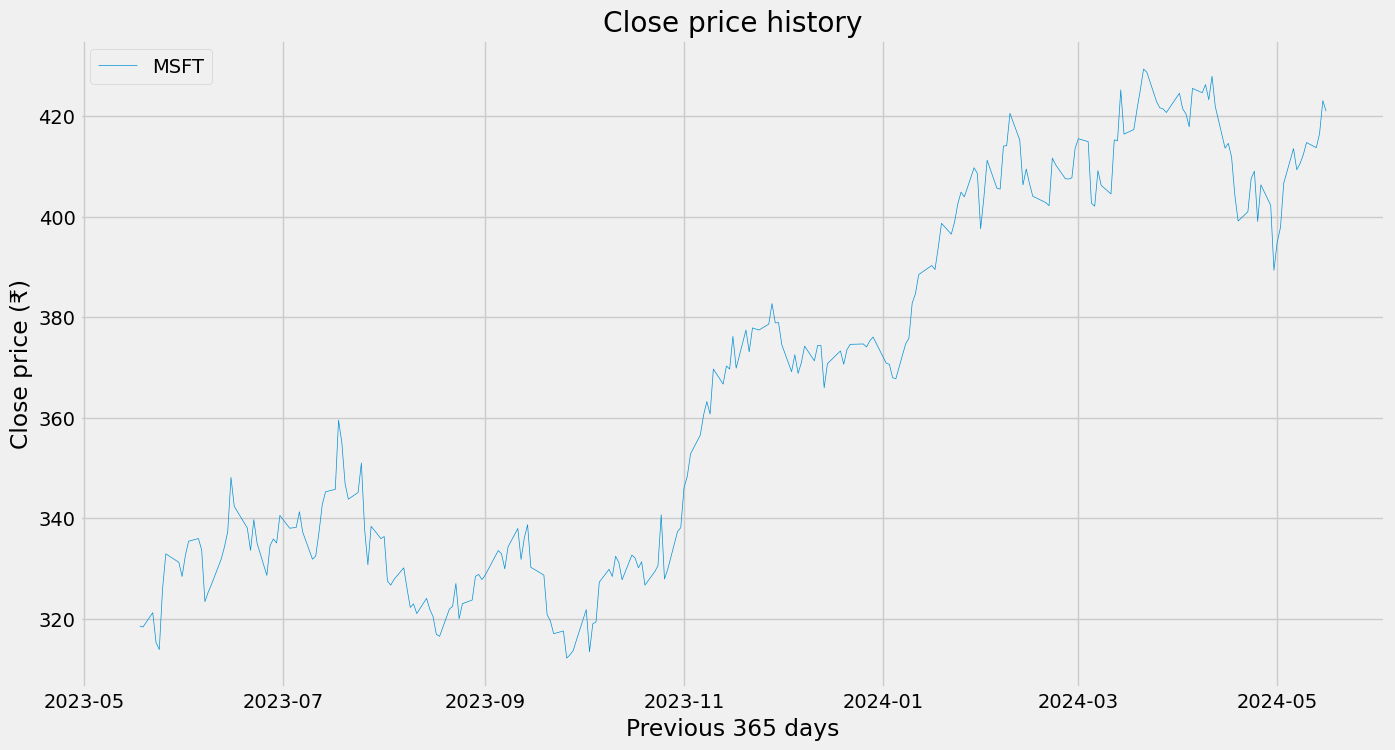

In [37]:
# Visualize data
plt.figure(figsize=(15, 8))
plt.plot(df['Close'], label = stock, linewidth = 0.5)
plt.title('Close price history')
plt.xlabel('Previous ' + str(num_days) + ' days')
plt.ylabel('Close price (₹)')
plt.legend(loc = 'upper left')
plt.show()

In [38]:
# Create SMA Indiacator
SMA20 = pd.DataFrame()
SMA20['Price'] = df['Close'].rolling(window = 20).mean()
SMA50 = pd.DataFrame()
SMA50['Price'] = df['Close'].rolling(window = 50).mean()

# Store all Data in new DataFrame
Data = pd.DataFrame()
Data['Price'] = df['Close']
Data['SMA20'] = SMA20['Price']
Data['SMA50'] = SMA50['Price']
Data['funds'] = 100000         # Initialize funds so that it could be later modified

In [39]:
# Create a function to signal when to buy and when to sell
def buy_sell_signal(data):
  buy_signal = []
  sell_signal = []
  open_position = []
  funds = [100000] * len(data)
  last_funds = 100000
  flag = 0  # flag = 0 means sell_flag and flag = 1 means buy_flag

  for i in range(len(data)):
    if data['SMA20'][i] > data['SMA50'][i]:
      if flag == 0:
        flag = 1
        buy_signal.append(data['Price'][i])
        last_pos = last_funds / data['Price'][i]
        funds[i] = last_funds
        open_position.append(last_pos)     # buy_quantity with 1 Lac Capital
        sell_signal.append(np.NaN)
      else:
        buy_signal.append(np.NaN)
        last_funds = data['Price'][i] * last_pos
        funds[i] = last_funds
        open_position.append(last_pos)
        sell_signal.append(np.NaN)
    elif data['SMA20'][i] < data['SMA50'][i]:
      if flag == 1:
        flag = 0
        buy_signal.append(np.NaN)
        last_funds = last_pos * data['Price'][i]
        funds[i] = last_funds
        open_position.append(0)
        sell_signal.append(data['Price'][i])
      else:
        buy_signal.append(np.NaN)
        funds[i] = last_funds
        open_position.append(0)
        sell_signal.append(np.NaN)
    else:
      buy_signal.append(np.NaN)
      open_position.append(0)
      sell_signal.append(np.NaN)
  return buy_signal, sell_signal, open_position, funds, flag

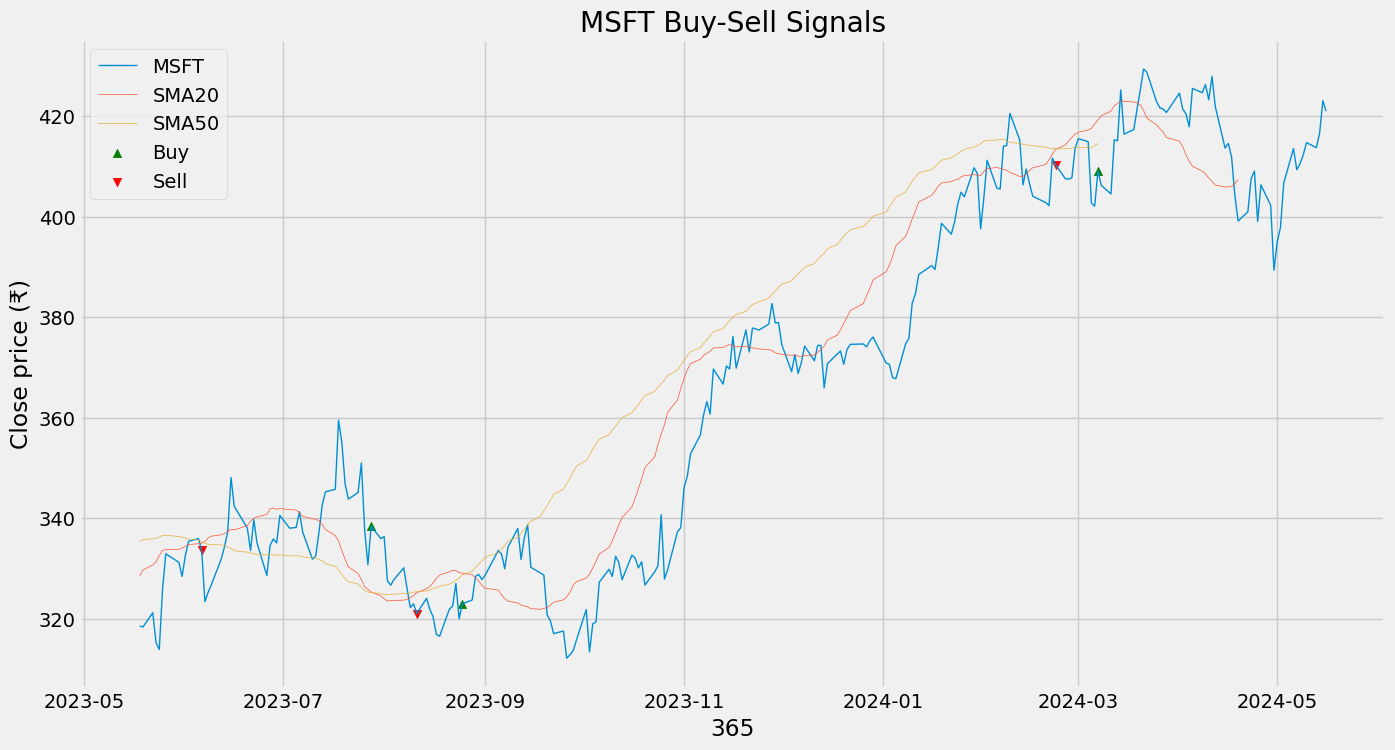

In [40]:
# Store buy and sell in Data
buy_sell = buy_sell_signal(Data)
#print(buy_sell)
Data['Buy_price'] = buy_sell[0]
Data['Sell_price'] = buy_sell[1]
Data['Open_pos'] = buy_sell[2]
Data['live_pos'] = Data['Open_pos'].multiply(Data['Price'])
Data['funds'] = buy_sell[3]

# Visualize Data and strategy to buy and sell NIFTY
plt.figure(figsize = (15, 8))
plt.plot(Data['Price'], label = str(stock), linewidth = 1)
plt.plot(Data['SMA20'], label = 'SMA20', linewidth = 0.5)
plt.plot(Data['SMA50'], label = 'SMA50', linewidth = 0.5)
plt.scatter(Data.index, Data['Buy_price'], label= 'Buy', marker = '^', color = 'g')
plt.scatter(Data.index, Data['Sell_price'], label= 'Sell', marker = 'v', color = 'r')
plt.title(str(stock) + ' Buy-Sell Signals')
plt.xlabel(num_days)
plt.ylabel('Close price (₹)')
plt.legend(loc = 'upper left')
plt.show()

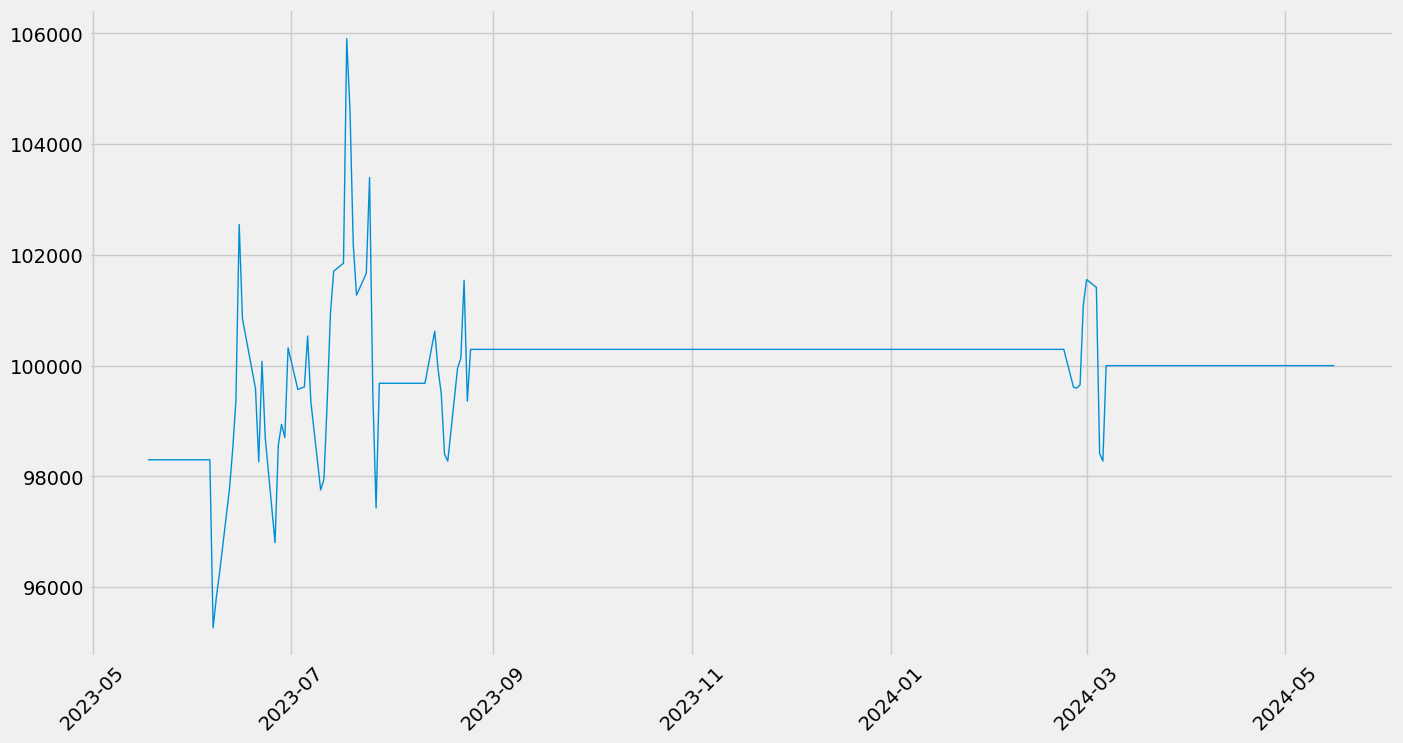

In [41]:
# Visualize results / PnL
plt.figure(figsize = (15, 8))
plt.plot(Data['funds'], linewidth = 1.0)
plt.xticks(rotation=45)
plt.show()